In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from data_loaders import model_names
from data_loaders import model_names
from data_loaders import load_da
from data_loaders import load_ens
from data_loaders import colors

from calpycles.plotting.distributions_2d import plot_dists_2d
from calpycles.plotting.distributions import plot_2d_excerpt
from calpycles.plotting.distributions import plot_samples_1d

from calpycles.parameters import ParametersDYCOMS_RF01 
PARAMS = ParametersDYCOMS_RF01()

plot_dir = f"figs/prior_seeds/"

In [3]:
model_name = "WENO_FULLRES"
c = colors[model_name]
N_seeds = 3

DA_list = [
    load_da("WENO_FULLRES", i_seed=i) for i in range(N_seeds)
]
DA_names = [
    f"Seed {i}" for i in range(N_seeds)
]

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed1...
... done loading samples for ensemble DYCOMS_RF01_N64_seed1.
Loaded observation DYCOMS_RF01_N64_seed1 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_observations.nc.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed2/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DY

In [4]:
# first repetition
ens = load_ens(model_name)
DA = DA_list[0]
Ec = DA.to_constrained(DA.E)

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.


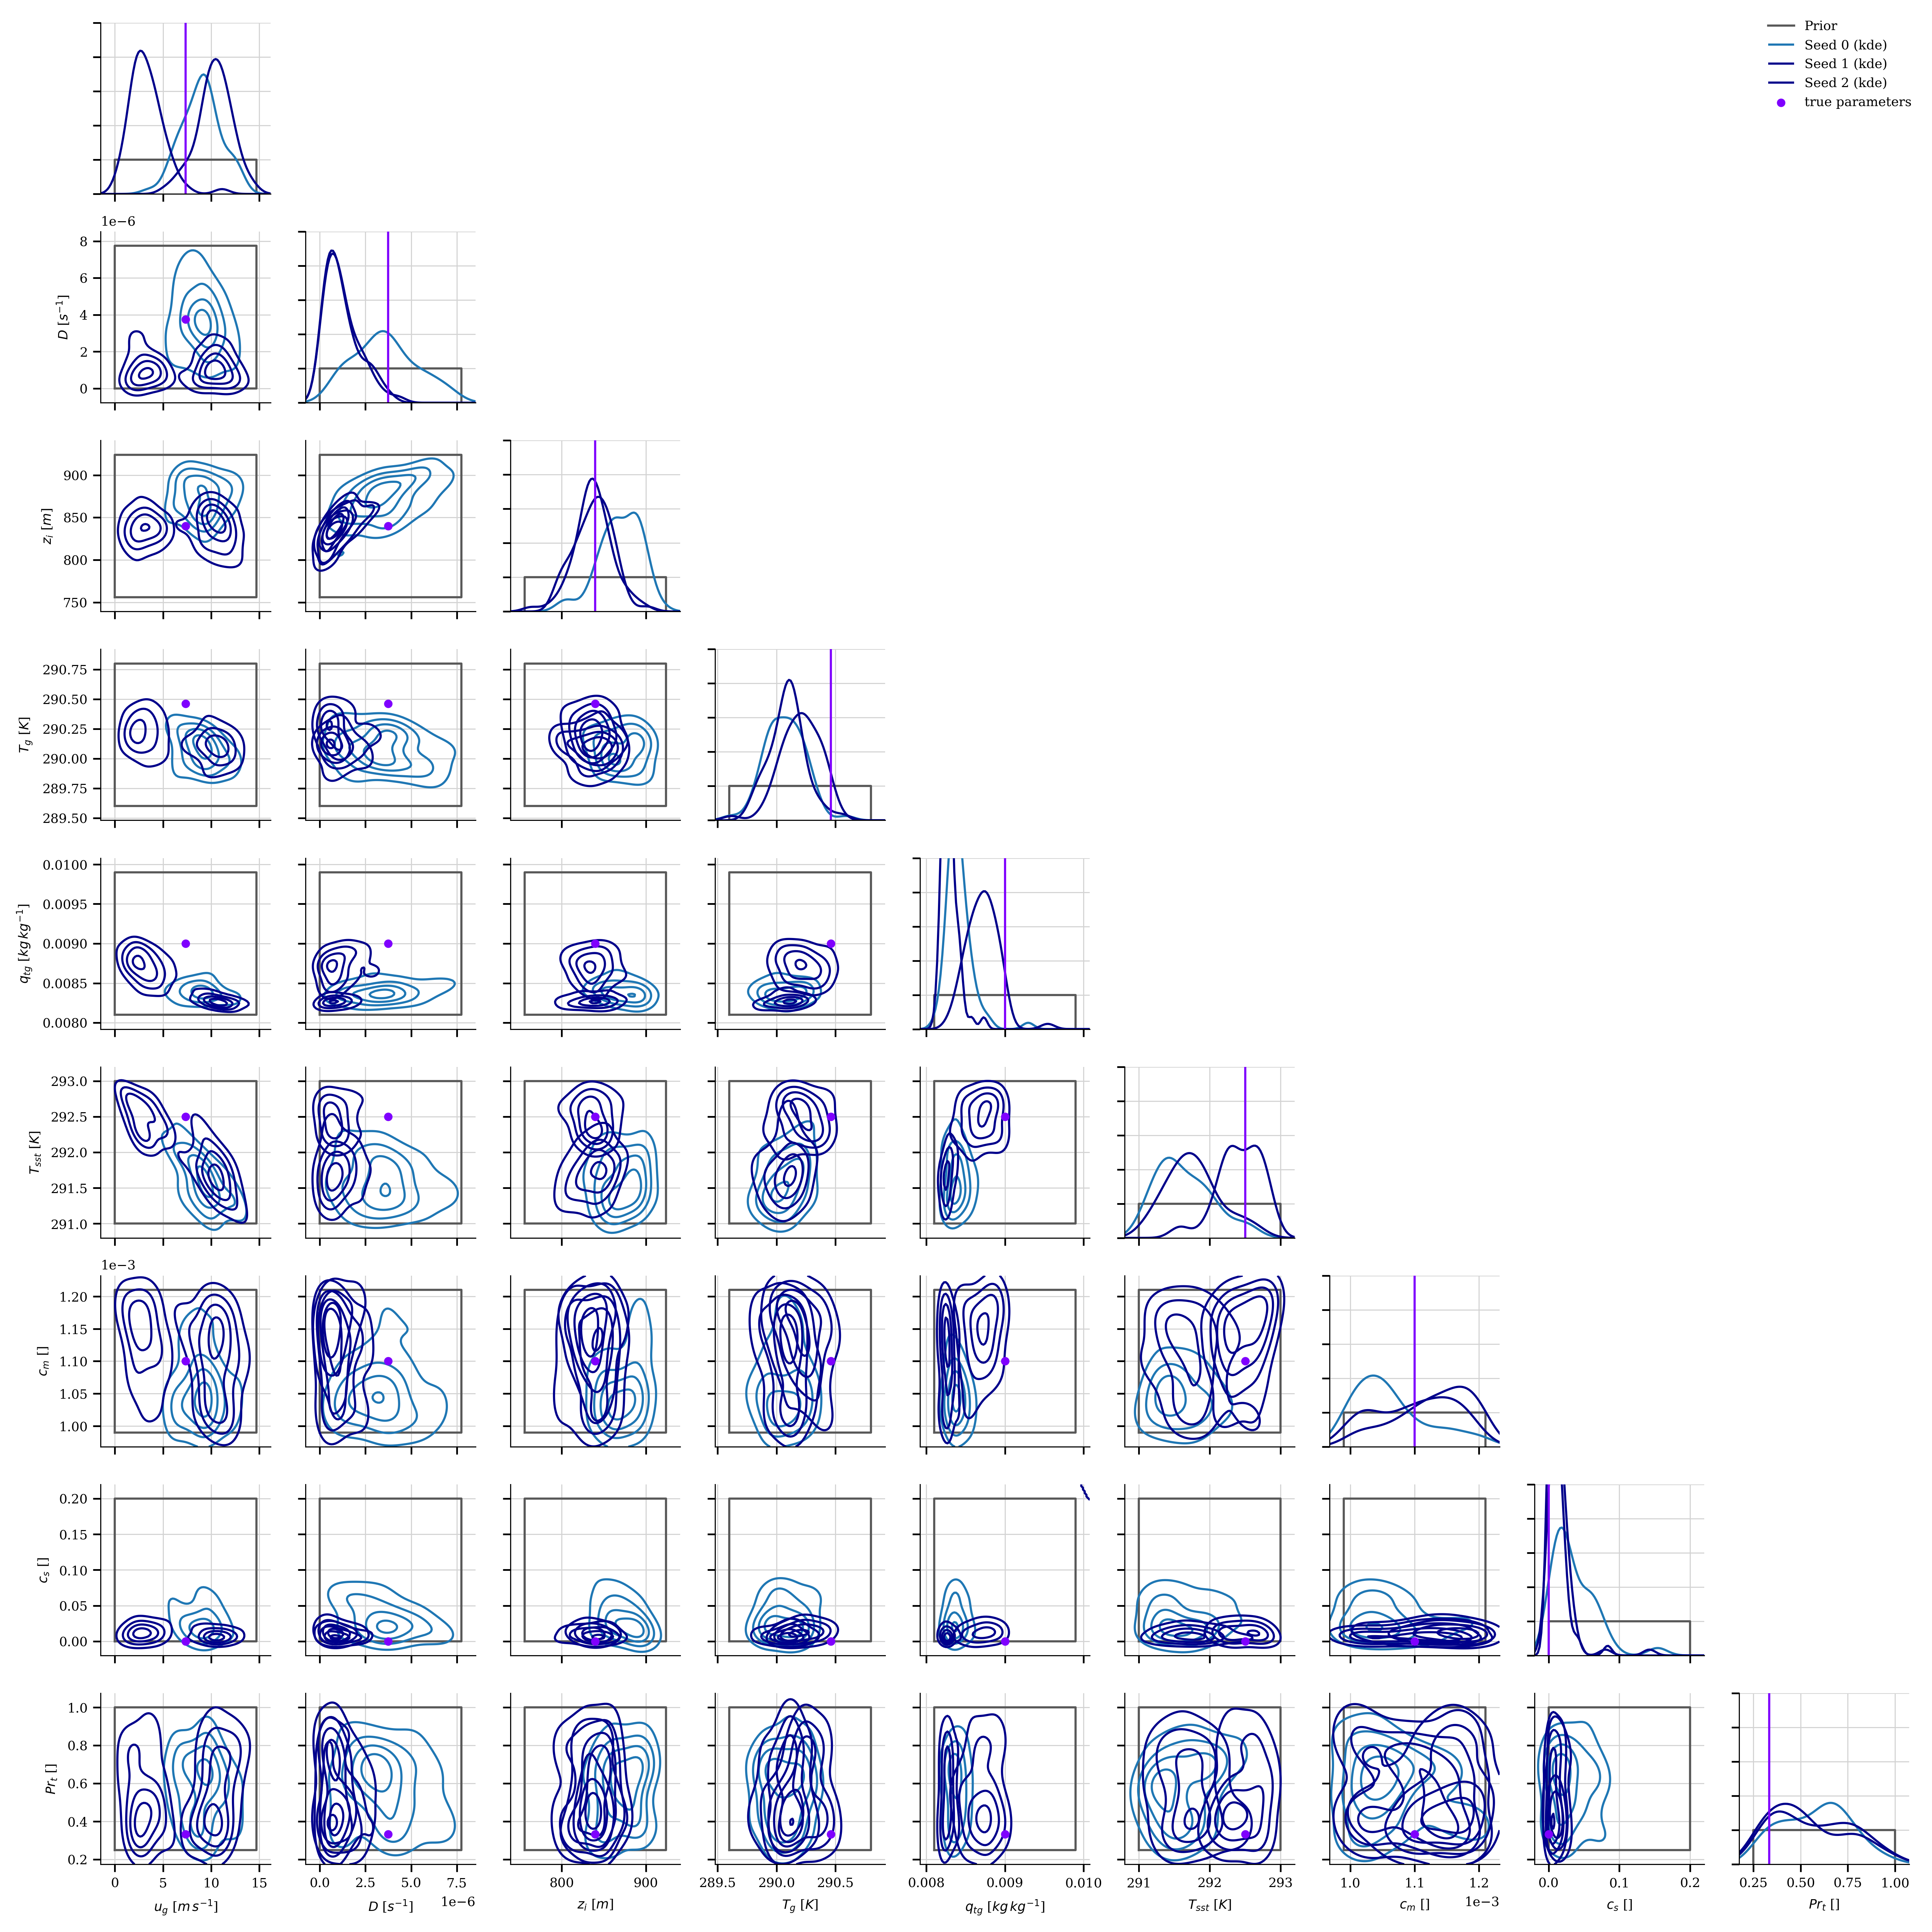

Saved figure  figs/prior_seeds/fig-dists_2d_prior_seeds_constrained


In [6]:
# all 2d combinations
c_others = "darkblue"
plot_dists_2d(
    [ens.dist] + [None]*N_seeds,
    dist_space="constrained", # unconstrained does not work currently
    dist_labels=["Prior"] + DA_names,
    params_to_plot=None,
    # params_to_plot=[0,4,5]
    samples = [Ec] + [DA_list[i].analysis(constrained=True) for i in range(N_seeds)],
    colors = [colors["PRIOR"], c, c_others, c_others], # [c]*N_seeds,
    do_samples = False,
    true_params=PARAMS.defaults,
    plot_dir=plot_dir,
    name="prior_seeds", # for saving
)

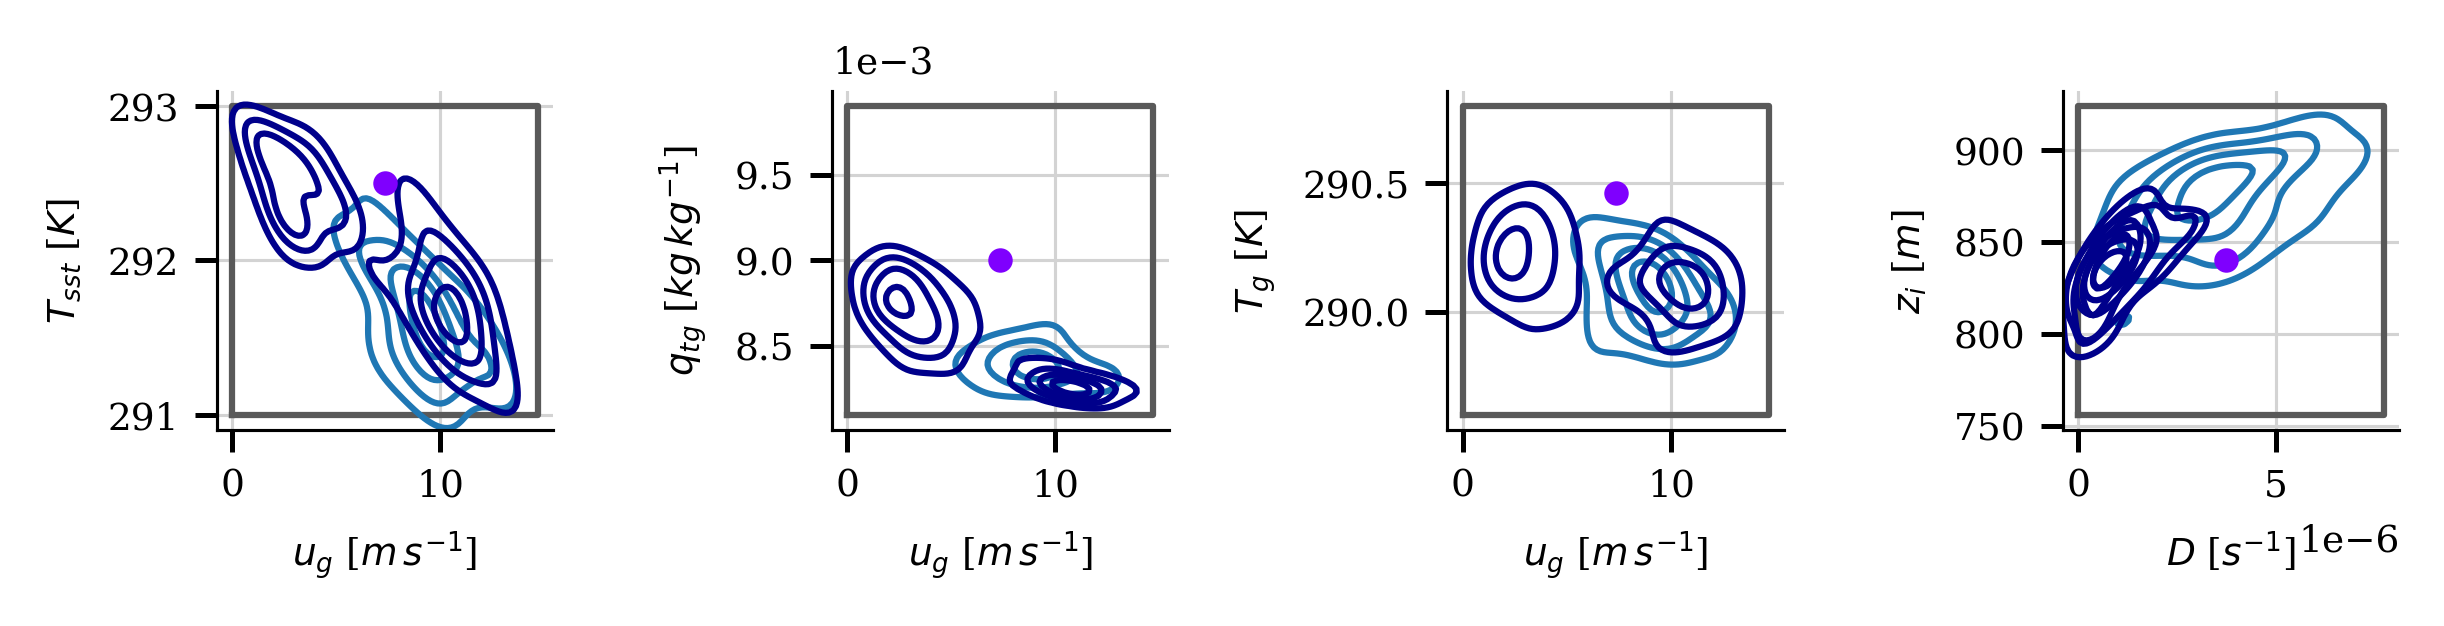

Saved figure  figs/prior_seeds/fig-dists_2d_prior_seeds_excerpt_0-5_0-4_0-3_1-2


In [11]:
plot_2d_excerpt(
    samples_list = [Ec.T] + [DA_list[i].analysis(constrained=True).T for i in range(N_seeds)],
    colors_list = [colors["PRIOR"], c, c_others, c_others], # [c]*N_seeds,
    pairs = [
        [0,5],
        [0,4],
        [0,3],
        [1,2],
    ],
    labels_list = ["Prior"] + DA_names,
    is_prior_list = [True, False, False, False],
    do_samples = False,
    save_file = f"{plot_dir}fig-dists_2d_prior_seeds_excerpt"
)

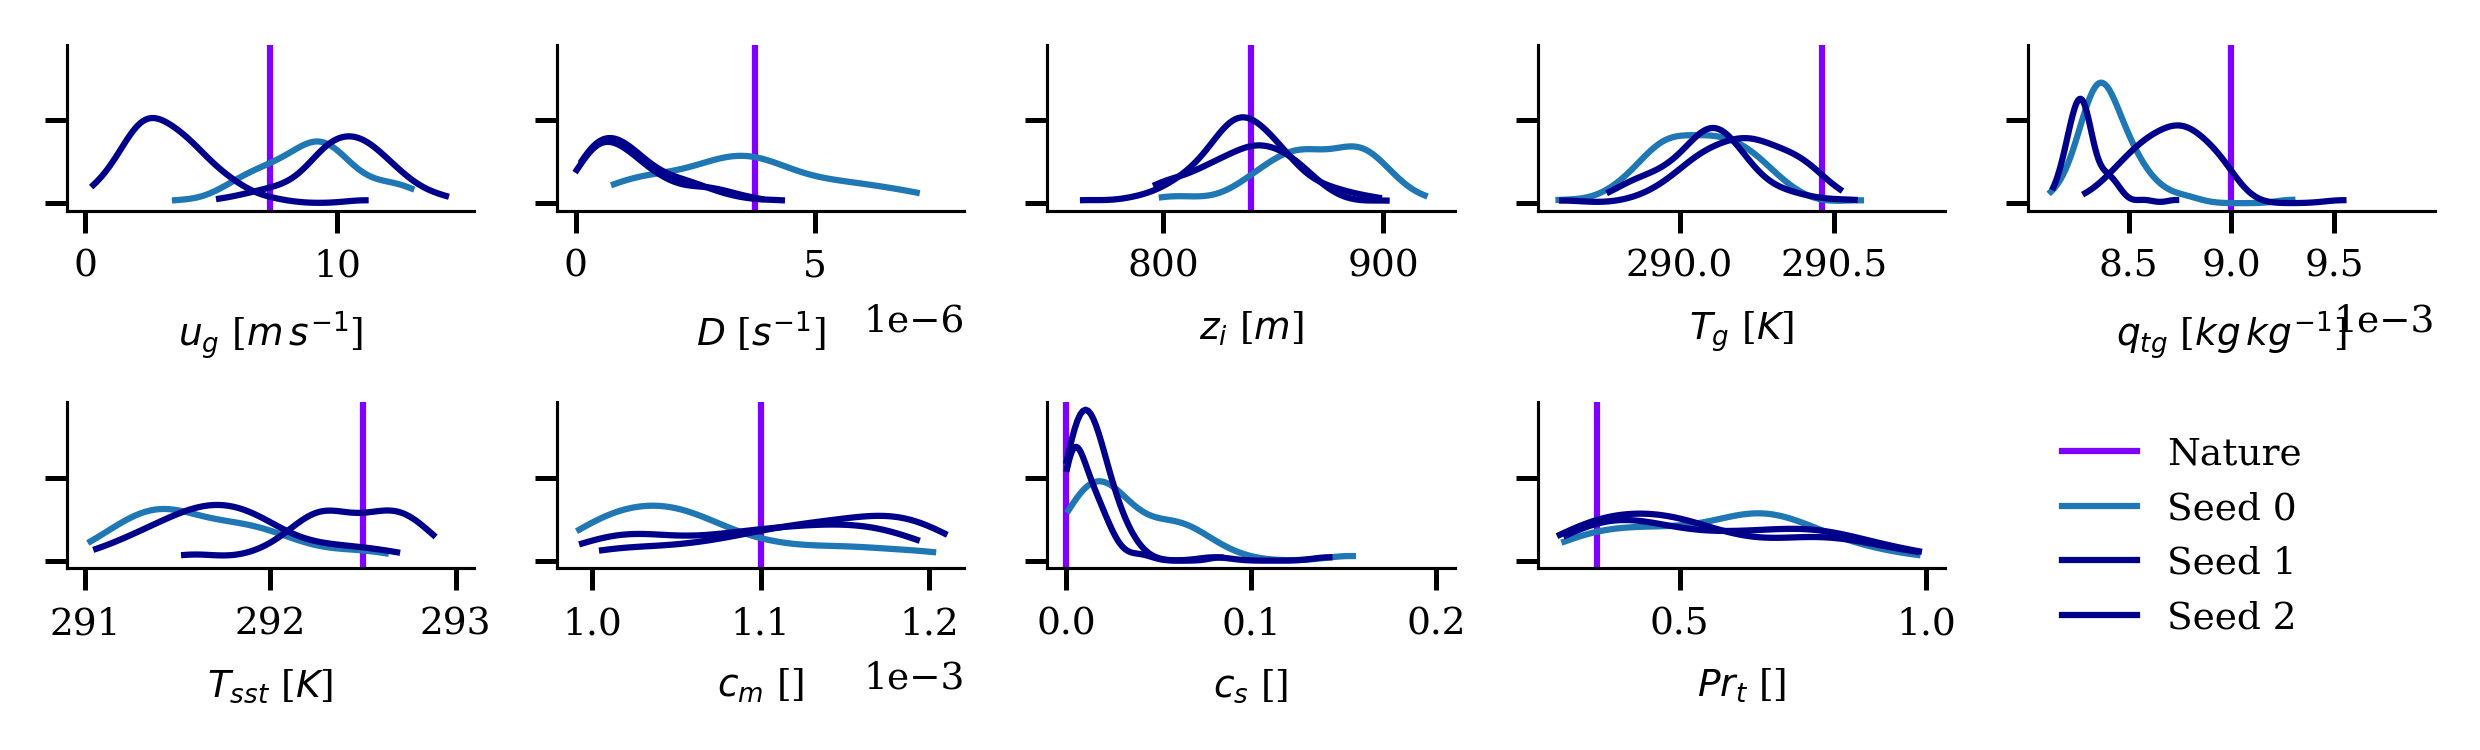

Saved figure  figs/prior_seeds//fig-dist1d_prior_seeds_constrained


In [14]:
# prior sampling
N_seeds = 3

plot_samples_1d(
    [
        DA_list[i].analysis(constrained=True) for i in range(N_seeds)
    ],
    DA_names,
    colors = [c, c_others, c_others],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file=f"{plot_dir}/fig-dist1d_prior_seeds_constrained",
)